### Machine Learning I - Fase 1

Nome: **Marcel Luís dos Santos Albuquerque**

#### Análise Exploratória e Preparação dos Dados


Nesta fase, você se apropriará dos dados, conhecendo o dataset. Será nesta fase que você fará a etapa de Exploratory Data Analysis, EDA, que consiste em uma análise exploratória dos dados. A partir das técnicas de EDA você descobrirá as características dos dados quanto ao tipo, atributos, escala, frequência, distribuição, dados faltantes etc.

Faz parte dessa etapa também a preparação dos dados, isso inclui a limpeza dos dados, correção, reescala e transformação, bem como a seleção dos atributos mais relevantes para a tarefa de classificação a ser explorada na fase 2.


##### Importando bibliotecas essenciais

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Carregando os dados

In [21]:
df = pd.read_csv('../data/raw/AtlanticForestInvertFloInteractionData_2022-07.csv')

##### Visualizando as primeiras linhas

In [22]:
df.head()

,municipality,state,country,veg_landuse_type_point_level1,veg_landuse_type_point_level2,veg_landuse_type_buffer5km_level1,veg_landuse_type_buffer5km_level2,temperature,temperature_num,temperature_range,...,invertebrate_genera,invertebrate_species_complete_name,invertebrate_origins,invertebrate_behavior,invertebrate_collector_structure,number_interactions,number_of_this_plant_interactions_onsite,number_of_this_invertebrate_interactions_onsite,plant_collected_material,invertebrate_collected
0,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Partamona,Partamona cupira,native,floral visitor,NaN,2.0,2.0,5.0,NaN,whole body
1,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Melipona,Melipona quadrifasciata,native,floral visitor,NaN,1.0,1.0,2.0,NaN,whole body
2,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Augochlora,Augochlora sp.,native,floral visitor,NaN,5.0,5.0,1.0,NaN,whole body
3,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,NaN,Syrphidae sp,native,floral visitor,NaN,7.0,7.0,1.0,NaN,whole body
4,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Partamona,Partamona cupira,native,floral visitor,NaN,1.0,1.0,6.0,NaN,whole body


##### Informações gerais: número de linhas, colunas, tipos e valores nulos

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18422 entries, 0 to 18421
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   municipality                                     18422 non-null  object 
 1   state                                            18422 non-null  object 
 2   country                                          18422 non-null  object 
 3   veg_landuse_type_point_level1                    17769 non-null  object 
 4   veg_landuse_type_point_level2                    9278 non-null   object 
 5   veg_landuse_type_buffer5km_level1                15396 non-null  object 
 6   veg_landuse_type_buffer5km_level2                4326 non-null   object 
 7   temperature                                      5829 non-null   object 
 8   temperature_num                                  5829 non-null   float64
 9   temperature_range           

##### Estatísticas descritivas das colunas numéricas

In [24]:
df.describe()

,temperature_num,temperature_range,number_interactions,number_of_this_plant_interactions_onsite,number_of_this_invertebrate_interactions_onsite
count,5829.000000,5829.000000,17186.000000,9326.000000,9187.000000
mean,24.364061,7.184217,10.002677,147.683144,46.998476
std,3.583772,4.914814,61.570269,439.225349,147.048603
min,7.000000,0.000000,0.000000,1.000000,1.000000
25%,22.000000,0.000000,1.000000,4.000000,1.000000
50%,25.000000,10.000000,1.000000,17.000000,4.000000
75%,25.000000,10.000000,1.000000,50.000000,16.000000
max,45.500000,17.000000,2430.000000,5100.000000,1576.000000


##### Analisando a quantidade de valores nulos por coluna

In [25]:
df.isnull().sum().sort_values(ascending=False)

relative_humidity                                  16593
veg_landuse_type_buffer5km_level2                  14096
temperature                                        12593
temperature_range                                  12593
temperature_num                                    12593
number_of_this_invertebrate_interactions_onsite     9235
veg_landuse_type_point_level2                       9144
number_of_this_plant_interactions_onsite            9096
invertebrate_collector_structure                    9028
plant_flower_shape                                  5998
invertebrate_origins                                5288
plant_flower_colour                                 4374
plant_habit                                         3870
plant_collected_material                            3738
plant_type                                          3588
invertebrate_behavior                               3066
veg_landuse_type_buffer5km_level1                   3026
invertebrate_genera            

##### Visualizando a distribuição de algumas variáveis numéricas

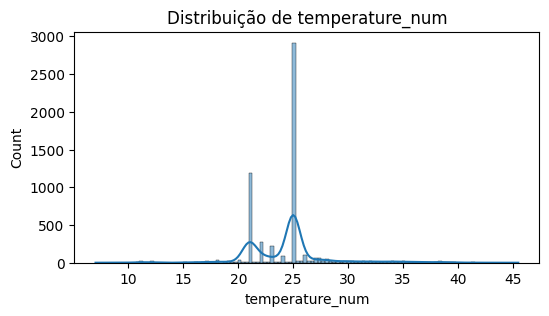

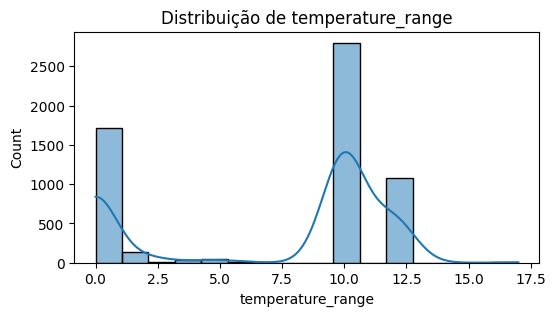

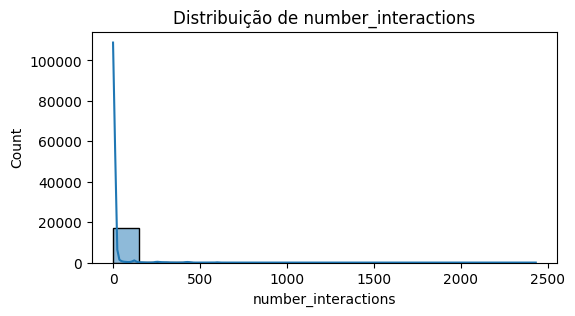

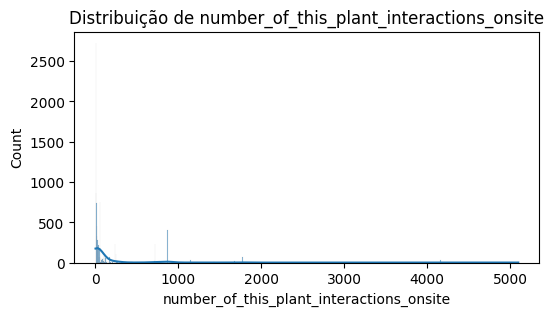

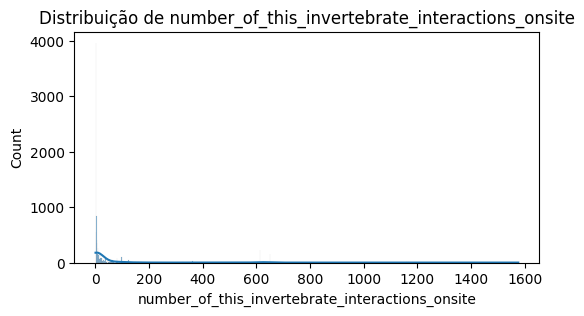

In [26]:
numero_colunas = df.select_dtypes(include=np.number).columns

for col in numero_colunas:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribuição de {col}")
    plt.show()

##### 1) Formatação dos atributos


Antes de analisar os atributos, precisamos unificar o formato de representação de cada coluna.

Verifique quais colunas estão com mais de uma representação de seu valor e formate para que todos os valores fiquem na mesma representação.

Ex: A coluna “temperature” precisa ser formatada para que todos os valores representem a temperatura em um formato único.

Por fim, você deve transformar todas as colunas para o formato numérico.

**OBS:** Lembre-se que colunas nominais e ordinais possuem formas diferentes de serem transformadas em numéricas.


In [ ]:
# Insira seu código aqui.
# Você pode criar células de código adicionais


# TODO
# 1) Visualização dos dados de cada coluna
# 2) Identificação das colunas que precisa ter seus dados unificados
# 3) Formatação de cada coluna coletada
# 4) Transformação das colunas no formato numérico

Importando bibliotecas necessárias

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

Carregando os dados

In [13]:
df = pd.read_csv('../data/raw/AtlanticForestInvertFloInteractionData_2022-07.csv')

Visualizando as 5 primeiras linhas

In [17]:
df.head()

,municipality,state,country,veg_landuse_type_point_level1,veg_landuse_type_point_level2,veg_landuse_type_buffer5km_level1,veg_landuse_type_buffer5km_level2,temperature,temperature_num,temperature_range,...,invertebrate_genera,invertebrate_species_complete_name,invertebrate_origins,invertebrate_behavior,invertebrate_collector_structure,number_interactions,number_of_this_plant_interactions_onsite,number_of_this_invertebrate_interactions_onsite,plant_collected_material,invertebrate_collected
0,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Partamona,Partamona cupira,native,floral visitor,NaN,2.0,2.0,5.0,NaN,whole body
1,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Melipona,Melipona quadrifasciata,native,floral visitor,NaN,1.0,1.0,2.0,NaN,whole body
2,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Augochlora,Augochlora sp.,native,floral visitor,NaN,5.0,5.0,1.0,NaN,whole body
3,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,NaN,Syrphidae sp,native,floral visitor,NaN,7.0,7.0,1.0,NaN,whole body
4,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Partamona,Partamona cupira,native,floral visitor,NaN,1.0,1.0,6.0,NaN,whole body


Exploração inicial dos dados

In [19]:
# Analisando tipos e valores nulos
df.info()

# Estatísticas básicas das variáveis numéricas
df.describe()

# Verificando colunas com dados faltantes
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18422 entries, 0 to 18421
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   municipality                                     18422 non-null  object 
 1   state                                            18422 non-null  object 
 2   country                                          18422 non-null  object 
 3   veg_landuse_type_point_level1                    17769 non-null  object 
 4   veg_landuse_type_point_level2                    9278 non-null   object 
 5   veg_landuse_type_buffer5km_level1                15396 non-null  object 
 6   veg_landuse_type_buffer5km_level2                4326 non-null   object 
 7   temperature                                      5829 non-null   object 
 8   temperature_num                                  5829 non-null   float64
 9   temperature_range           

relative_humidity                                  16593
veg_landuse_type_buffer5km_level2                  14096
temperature_num                                    12593
temperature_range                                  12593
temperature                                        12593
number_of_this_invertebrate_interactions_onsite     9235
veg_landuse_type_point_level2                       9144
number_of_this_plant_interactions_onsite            9096
invertebrate_collector_structure                    9028
plant_flower_shape                                  5998
invertebrate_origins                                5288
plant_flower_colour                                 4374
plant_habit                                         3870
plant_collected_material                            3738
plant_type                                          3588
invertebrate_behavior                               3066
veg_landuse_type_buffer5km_level1                   3026
invertebrate_genera            

O dataset apresenta 31 colunas e 18.422 linhas.

In [16]:
df.describe()

,temperature_num,temperature_range,number_interactions,number_of_this_plant_interactions_onsite,number_of_this_invertebrate_interactions_onsite
count,5829.000000,5829.000000,17186.000000,9326.000000,9187.000000
mean,24.364061,7.184217,10.002677,147.683144,46.998476
std,3.583772,4.914814,61.570269,439.225349,147.048603
min,7.000000,0.000000,0.000000,1.000000,1.000000
25%,22.000000,0.000000,1.000000,4.000000,1.000000
50%,25.000000,10.000000,1.000000,17.000000,4.000000
75%,25.000000,10.000000,1.000000,50.000000,16.000000
max,45.500000,17.000000,2430.000000,5100.000000,1576.000000


1.2) Identificação das colunas que precisa ter seus dados unificados

#2) Análise e escolha dos atributos

Agora, você precisa analisar cada atributo para verificar quais possuem informação relevantes para classificar a coluna alvo.

Utilize as técnicas de visualização e análise de dados vistas em aula para realizar esse processo.

Ao final da análise, você deve escolher os atributos que considerou mais relevântes com base na análise realizada (JUSTIFIQUE A ESCOLHA DE CADA COLUNA)

In [ ]:
# Insira seu código aqui.
# Você pode criar células de código adicionais

# TODO
# 1) Visualização dos dados
# 2) Análise sobre possiveis relação encontradas
# 3) Escolha das colunas mais relevântes com justificativa

#3) Preenchimento de dados faltantes

Após a formatação e seleção das colunas relevantes, você deve garantir que todas as colunas estejam com dados válidos em cada coluna.

Para isso, você deve preencher os dados faltantes das colunas usando o algoritmo de agrupamento K-means.

Os passos desse processo são:

Passo 1: Crie um segundo dataset (dataset 2) sem as colunas com dados faltantes.

![Passo1](https://drive.google.com/uc?export=download&id=1dBpwbuWW-I_6_paIQNlfGER2ZZinZ59R)


Passo 2: Aplique o K-means no dataset 2 para gerar clusters de tuplas com características semelhantes.

![Passo2](https://drive.google.com/uc?export=download&id=1mNPNPdecWCqMraoS57a6TQKjkhGDgUHU)

Passo 3: Para cada cluster, selecione as tuplas que não possuam dados faltantes.

![Passo3](https://drive.google.com/uc?export=download&id=1xLwkPSjjxuZpW2zzk0k_-w3-AmvN84gj)

Passo 4: Para as tuplas selecionadas, calcula o atributo estatístico mais adequado para a coluna (média, mediana, moda, etc).

![Passo4](https://drive.google.com/uc?export=download&id=1zt35CNY_CWSGX_igHsA_AWKNZl34TM8K)

Passo 5: Para cada tupla com dados faltantes, utilize o atributo estatístico referente ao seu grupo para preencher o dado da coluna.

![Passo5](https://drive.google.com/uc?export=download&id=1rEvU-6eaQURjzIrblpIiA7b-FFYj_bRD)


In [ ]:
# Insira seu código aqui
# Você pode adicionar células adicionais

# TODO
# 1) Gerar o dataset sem as colunas com dados faltantes
# 2) Aplicar o K-means no novo dataset (explorando o melhor valor de K)
# 3) Cálcular um atributo estatístico (média, moda, mediana, etc), no dataset original, das colunas com dados faltantes
# 4) Preencher os valores das linhas com dados faltantes com o atributo estatístico referente ao seu grupo do K-means

# 4) Escala dos atributos

Por fim, você precisa reescalar os dados, para que os algoritmos consigam aprender as relações entre os dados sem muito ruído e melhora a classificação.

Lembre-se de verificar e tratar colunas com outliers.

In [ ]:
# Insira seu código aqui
# Você pode adicionar células adicionais

# TODO
# 1) Verificar quais dados possuem outliers e tratar de acordo
# 2) Reescalar os dados

# Check-List

Com isso, você completa a fase 1 da disciplina. Para auxiliar você a verificar se o trabalho está adequado para a entrega, criamos uma lista de item que devem ser satisfeitos ao final do trabalho.

- Todas as colunas selecionadas possuem justificativa;
- Todas as colunas estão com a sua representação unificada;
- Todas as colunas estão no formato numérico;
- Todas as colunas estão com dados válidos (sem dados falantes);
- Todas as colunas estão reescaladas.
